# TP 3 Machine Learning
# Performence d'un classifieur
## $ Auteur: $
### $ Koussaila$ $KADI$ 
### $ kadi.koussaila@outlook.fr $

## Résumé:

On travaille sur des images de la base Pratheepan Dataset
(http://cs-chan.com/
downloads_skin_ dataset.html) dont on souhaite détecter les pixels de teinte chaire afin
d’accélérer un algorithme de détection de visages. Pour cela, la vérité de terrain a été déterminée
pour chaque image. On a récupéré dans X_train, y_train, les pixels des 26 premières images et
dans X_test, y_test, ceux des 4 dernières images. Seul un pixel sur 2000 a été conservé pour
avoir des temps de calcul raisonnables. X_ est composé des composantes chromatiques Cb, Cr
de chaque pixel et y_ est composé de la classe du pixel, 1 si couleur peau, 0 sinon.


<function matplotlib.pyplot.show(*args, **kw)>

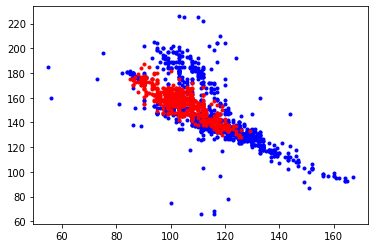

In [1]:

import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt,exp,pi
import math
[X_train, y_train, X_test, y_test] = np.load("TP3.npy",allow_pickle=True ) 

#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 

 #Pixel non peau
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] )) 
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show








In [2]:
print( X_train.shape) # no des pixels dans les 26 images
print( X_test.shape)  # no des pixels dans les 4 images
print(T_train.shape) # # no de pixels de teinte chaire
print(F_train.shape) # no de pixels de teinte non chaire



(2370, 2)
(284, 2)
(639, 2)
(1731, 2)


In [3]:
X_train.shape

(2370, 2)

In [4]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [5]:
# II Estimation de la densité de probabilité a priori de la teinte chaire par une loi
  #   normale 2D avec des dimensions décorrélées

mcb= np.mean(T_train[:,0]) #je prend la premiere composante 
mcr=np.mean(T_train[:,1]) #je prend la 2eme composante
stgb = np.std(T_train[:,0])
stgr = np.std(T_train[:,1])

print(mcb)
print(stgb)
print(mcr)
print(stgr)



104.29577464788733
9.067914388009926
155.19405320813772
11.607693835769547


In [104]:
p1_train= np.zeros(len(y_train))   #initialisé
p2_train= np.zeros(len(y_train))

def norm1(x, m, s):
  p =1/(math.sqrt(2*math.pi)*s)*math.exp(-(x-m)*(x-m)/(2*s*s))
  return p

  
for i in range ( len(y_train)) :
    p1_train[i]=norm1(X_train[i,0],mcb,stgb)*norm1(X_train[i,1],mcr,stgr)
    
print(p1_train)


[2.43080019e-04 1.05671597e-04 9.10961125e-05 ... 8.74500936e-06
 1.09212844e-05 4.20007181e-05]


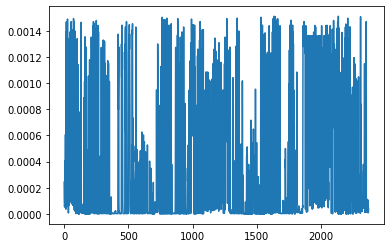

In [105]:
plt.plot(p1_train)

In [106]:
p1_train.shape

(2370,)

In [107]:
p1_test= np.zeros(len(y_test))   #initialisé
for i in range ( len(y_test)) :
    p1_test[i]=norm1(X_test[i,0],mcb,stgb)*norm1(X_test[i,1],mcr,stgr)


In [108]:
seuil=np.mean(p1_train)
print(seuil)


0.0004021648006133216


In [109]:
TP=0
TN=0
FP=0
FN=0


for i in range(len(p1_test)):
  if (p1_test[i]>seuil):
    if y_test[i]==1:
      TP=TP+1
    else:
      FP=FP+1
  else :
    if y_test[i]==0:
      TN=TN+1
    else:
      FN=FN+1

print(TP,TN,FP,FN)



102 120 60 2


In [110]:
sensibilité=TP/(TP+FN)
spécifité=TN/(FP+TN)
print(sensibilité,spécifité)


0.9807692307692307 0.6666666666666666


In [111]:
NB = 20
step = (np.max(p1_train) - np.min(p1_train) ) / NB
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)
print(SEUILS)

[1.41029933e-19 7.55518435e-05 1.51103687e-04 2.26655530e-04
 3.02207374e-04 3.77759217e-04 4.53311061e-04 5.28862904e-04
 6.04414748e-04 6.79966591e-04 7.55518435e-04 8.31070278e-04
 9.06622122e-04 9.82173965e-04 1.05772581e-03 1.13327765e-03
 1.20882950e-03 1.28438134e-03 1.35993318e-03 1.43548503e-03]


In [112]:
sens= np.zeros(20)
spe= np.zeros(20)
TP=0
TN=0
FP=0
FN=0

for j in range(len(SEUILS)) :
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range(len(p1_test)):
    if (p1_test[i]>SEUILS[j]):
      if y_test[i]==1:
        TP=TP+1
      else:
        FP=FP+1
    else :
      if y_test[i]==0:
        TN=TN+1
      else:
        FN=FN+1
  sens[j]=TP/(TP+FN)
  spe[j]=TN/(FP+TN)
print(sens)
print(spe)
        
    



[1.         1.         1.         1.         0.99038462 0.99038462
 0.98076923 0.98076923 0.96153846 0.94230769 0.93269231 0.89423077
 0.85576923 0.80769231 0.75961538 0.70192308 0.58653846 0.53846154
 0.38461538 0.21153846]
[0.         0.52777778 0.57222222 0.6        0.64444444 0.66111111
 0.68888889 0.71111111 0.71666667 0.71666667 0.72222222 0.72222222
 0.72777778 0.73333333 0.75       0.78333333 0.84444444 0.96111111
 0.99444444 0.99444444]


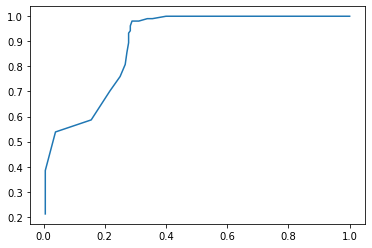

In [113]:

plt.plot(1-spe,sens)

In [132]:
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

  


In [135]:
cov = np.cov(np.transpose(T_train))
p2_train= np.zeros(len(y_train))  #initialisé

SyntaxError: ignored

(2370, 2)


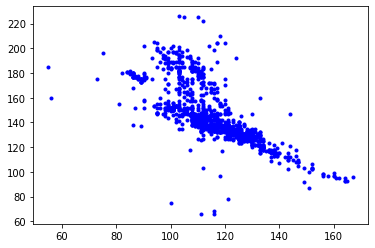

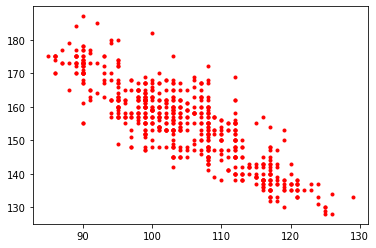

(639, 2)
(1731, 2)
(2370, 2)
(2370,)
(284, 2)
0.0004021648006133216
[[120  60]
 [  2 102]]
(2, 2)


ValueError: shapes (2,2370) and (2,2) not aligned: 2370 (dim 1) != 2 (dim 0)

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 10 13:53:44 2021

@author: Admin
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  accuracy_score, roc_curve

def norm1(x, m, s):
    p =1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)*(x-m)/(2*s*s)) 
    return p

def norm2(x, m, cov): 
    a = np.dot(np.transpose((x-m)), np.linalg.inv(cov)) 
    a = np.dot(a, (x-m)) 
    p =1/(np.sqrt(2*np.pi*np.linalg.det(cov)))*np.exp(-0.5*a) 
    return p

def classifieur (p_test,m_train,y_test):
    y_pred=np.zeros(np.size(y_test))
    for i in  range (len(p_test)):
        if p_test[i]>m_train:
            y_pred[i]=1
    return y_pred

#chargement des données

[X_train, y_train, X_test, y_test] = np.load("TP3.npy",allow_pickle=True)
print(np.shape(X_train))
#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))

plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show()
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show()

#deux colonnes qui correspondent à Cb et Cr
print(np.shape(T_train)) #nombre de pixels de teinte chaire=639
print(np.shape(F_train)) #nombre de pixels de teinte non chaire=1731

#dimension des données = 2370
print(np.shape(X_train))

#Estimation de la densité de probabilité a priori des pixels de teinte chaire
#moyennes
m_cb=np.mean(T_train[:,0])
m_cr=np.mean(T_train[:,1])

#ecarts_type
sigma_cb=np.std(T_train[:,0])
sigma_cr=np.std(T_train[:,1])

p1_train=norm1(X_train[:,0], m_cb, sigma_cb) * norm1(X_train[:,1], m_cr, sigma_cr)
# dimension de p1_train = vecteur de 639 lignes
print(np.shape(p1_train))

#hypothèse nous permet d’estimer la valeur de la loi normale à partir de l’équation précédente ?   

#Classification
print(np.shape(X_test))

m_p1_train=p1_train.mean()
print(m_p1_train)

p1_test=norm1(X_test[:,0], m_cb, sigma_cb) * norm1(X_test[:,1], m_cr, sigma_cr) # 
y_pred=classifieur(p1_test,m_p1_train,y_test)

#matrice de confusion
mat=confusion_matrix(y_test,y_pred)
print(mat)

TP=mat[0,0]
TN=mat[1,1]
FP=mat[1,0]
FN=mat[0,1]

#sensibilité et specificité
sens=TP/(TP+FN)
spec=TN/(TN+FP)

#taux de bonne classification
TB=(TP+TN)/(TP+TN+FP+FN)


#Pourquoi avoir choisi ce seuil initial

#Courbe ROC
NB = 20
step = (np.max(p1_train) - np.min(p1_train) ) / NB 
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)
sensibilite=np.zeros(NB)
specificite=np.zeros(NB)

for i in range (0,20):
        
    y_pred=classifieur(p1_test,SEUILS[i],y_test)
    mat=confusion_matrix(y_test,y_pred)
    sensibilite[i]=mat[0,0]/(mat[0,0]+mat[0,1])
    specificite[i]=mat[1,1]/(mat[1,1]+mat[1,0])
    
plt.plot(1-specificite,sensibilite,'b')
    

#Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D
    
covariance= np.cov(np.transpose(T_train)) #non pas X_train
print(np.shape(covariance))

m=np.mean(T_train,axis=0)
p1_test_2=norm2(X_train,m,covariance)

for i in range (0,20):
        
    y_pred=classifieur(p1_test_2,SEUILS[i],y_test)
    mat=confusion_matrix(y_test,y_pred)
    sensibilite[i]=mat[0,0]/(mat[0,0]+mat[0,1])
    specificite[i]=mat[1,1]/(mat[1,1]+mat[1,0])
    
plt.plot(1-specificite,sensibilite,'r')